# Superstore Sales EDA

We will do Exploratory Data Analysis using superstore sales data. This data can be found on Kaggle https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### Data Cleaning
We have to cleaning the data before using it, clean data make our analyze more effective and efficient

In [3]:
#cek null value
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
#cek data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
#cek duplicated value
df.duplicated().sum()

0

In [6]:
df.shape

(9994, 21)

In [7]:
#change data types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
#add column needed for analysis
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Order Month Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Order Month Name'] = pd.to_datetime(df['Order Date']).dt.month_name().str[:3]
df['Order Day'] = pd.to_datetime(df['Order Date']).dt.day_name()

In [9]:
#final data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month Year,Order Month,Order Month Name,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,11,Nov,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,11,Nov,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06,6,Jun,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,10,Oct,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10,10,Oct,Sunday


##### Exploratory Data Analysis
we will analyze the data to discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical chart

In [10]:
#description of the data
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000


##### Sales Revenue Analysis: 
Tracking the total sales revenue over time provides insights into the overall financial performance of the superstore. It helps identify peak seasons and periods of high or low sales.

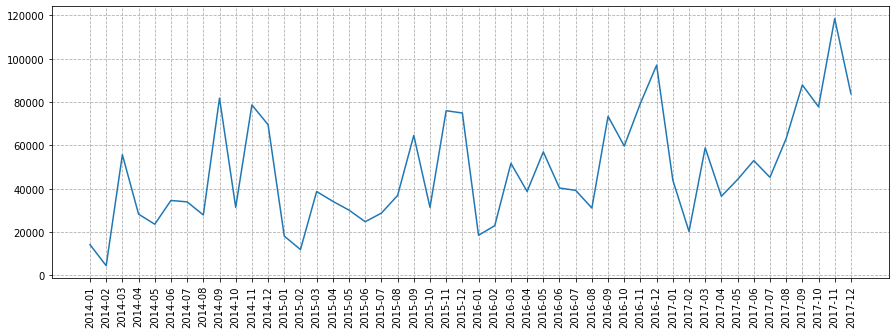

In [11]:
#sales growth over years
sales_growth = df.groupby(['Order Month Year'])['Sales'].sum()
plt.figure(figsize=(15,5))
plt.plot(sales_growth)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.show()

The chart show that there is sales pattern. On every March, September, and end of the year (between nov-dec), the sales will highly increase and deacrease in the beginning of the year (between jan-feb) and april

In [12]:
df['Country'].unique()

array(['United States'], dtype=object)

##### Sales by Region: 
Superstores have multiple locations. Analyzing sales by region helps identify the best-performing stores and areas for expansion or improvement.

In [13]:
#sales by region
reg_sales = df.groupby('Region')['Sales','Profit','Quantity'].sum().sort_values('Sales',ascending=False)
reg_sales

,Sales,Profit,Quantity
Region,,,
West,725457.8245,108418.4489,12266
East,678781.2400,91522.7800,10618
Central,501239.8908,39706.3625,8780
South,391721.9050,46749.4303,6209


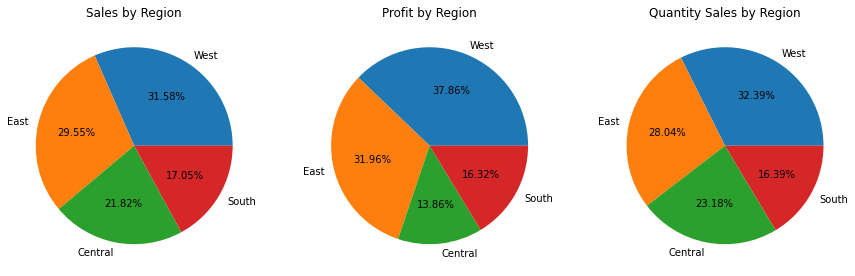

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].pie(reg_sales.Sales, autopct='%1.2f%%', labels=reg_sales.Sales.index)
ax[0].set_title('Sales by Region')
ax[1].pie(reg_sales.Profit, autopct='%1.2f%%', labels=reg_sales.Profit.index)
ax[1].set_title('Profit by Region')
ax[2].pie(reg_sales.Quantity, autopct='%1.2f%%', labels=reg_sales.Quantity.index)
ax[2].set_title('Quantity Sales by Region')

plt.show()

West region has best sales performance, lead in sales revenue, profit, and quantity product sales

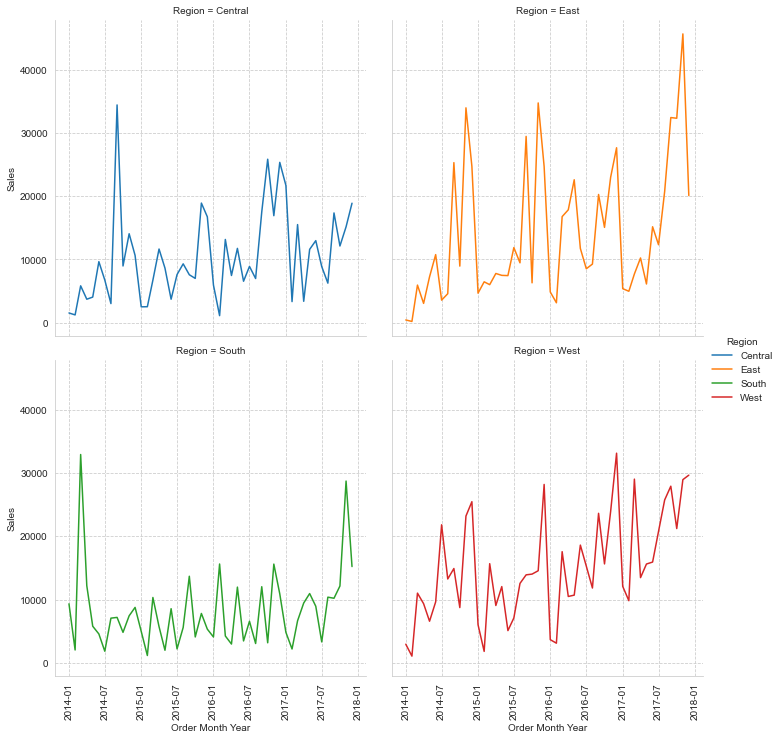

In [15]:
#sales by region
sales_reg = df.groupby(['Order Month Year','Region'])['Sales'].sum().reset_index().sort_values(['Order Month Year','Region'])
sales_reg['Order Month Year'] = pd.to_datetime(sales_reg['Order Month Year'])
#sns.set(style='ticks')
sns.set_style('whitegrid', {'grid.linestyle':'--'})
r = sns.relplot(data=sales_reg, x="Order Month Year", y="Sales", hue="Region", col="Region", col_wrap=2, kind='line')
r.set_xticklabels(rotation = 90)
plt.show()

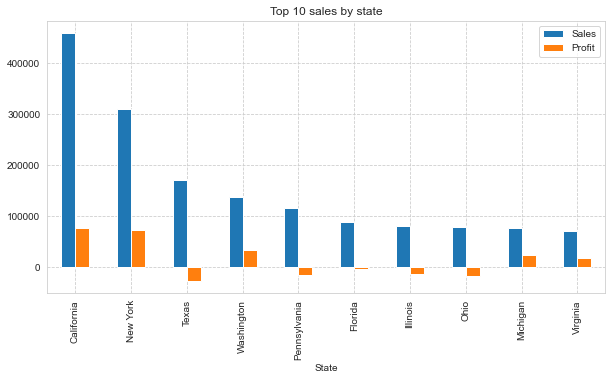

In [16]:
top_state_sales = df.groupby('State')['Sales','Profit'].sum().nlargest(10,'Sales')

top_state_sales.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 sales by state')
plt.show()

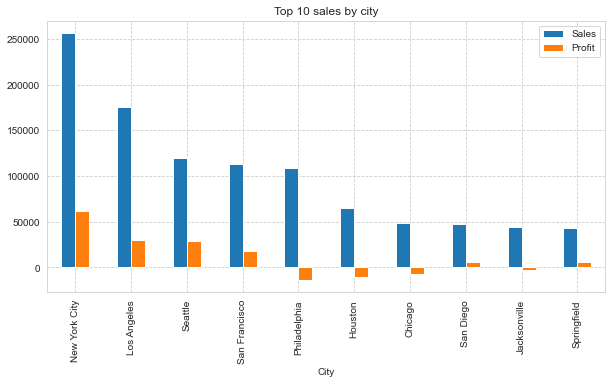

In [17]:
top_city_sales = df.groupby('City')['Sales','Profit'].sum().nlargest(10,'Sales')

top_city_sales.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 sales by city')
plt.show()

##### Sales by Product Category
Analyzing sales by product category helps understand which categories are driving revenue and which may require improvement.

In [18]:
#sales by product category
product_sales = df.groupby('Category').agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).sort_values('Sales',
                                                                                                        ascending=False)
product_sales

,Sales,Profit,Quantity
Category,,,
Technology,836154.0330,145454.9481,6939
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906


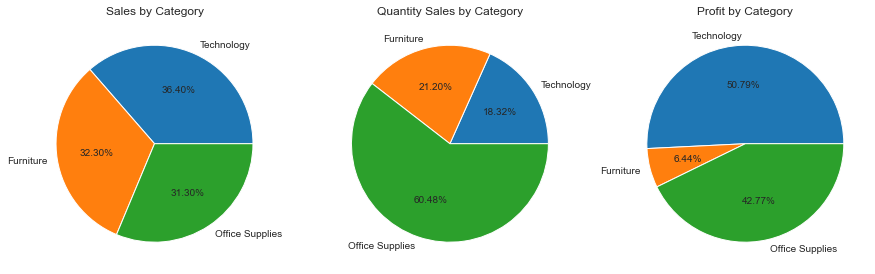

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].pie(product_sales.Sales, autopct ='%1.2f%%', labels=product_sales.Sales.index)
ax[0].set_title('Sales by Category')

ax[1].pie(product_sales.Quantity, autopct ='%1.2f%%', labels=product_sales.Quantity.index)
ax[1].set_title('Quantity Sales by Category')

ax[2].pie(product_sales.Profit, autopct='%1.2f%%', labels=product_sales.Profit.index)
ax[2].set_title('Profit by Category')

plt.show()

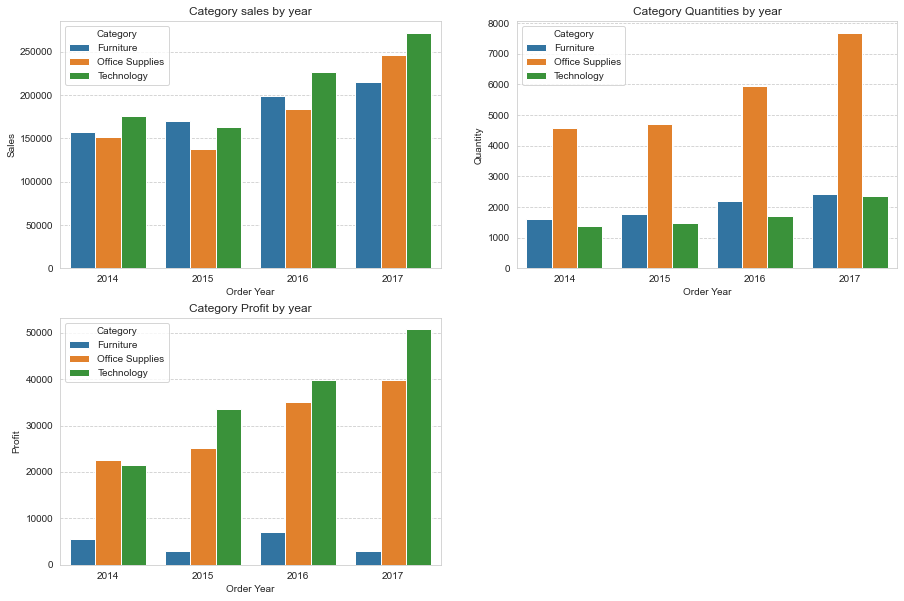

In [20]:
#category sales by year
product_perf = df.groupby(['Order Year','Category']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).reset_index()
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.delaxes(ax[1,1])
sns.barplot(x='Order Year', y='Sales', hue='Category', data=product_perf, ax=ax[0,0]).set(title='Category sales by year')
sns.barplot(x='Order Year', y='Quantity', hue='Category', data=product_perf, ax=ax[0,1]).set(title='Category Quantities by year')
sns.barplot(x='Order Year', y='Profit', hue='Category', data=product_perf, ax=ax[1,0]).set(title='Category Profit by year')
plt.show()

Technology makes high profits and sales revenue even though the number of sales of items is the least, office supplies have the most sales of items and second category makes high profits, and although furniture is in the second which makes high sales revenue but the profits are the least

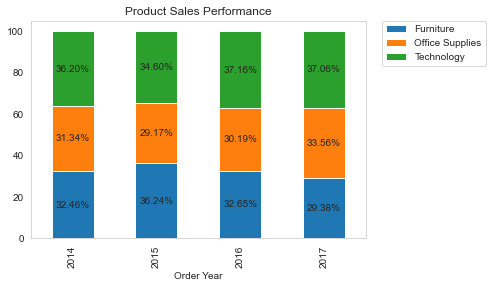

In [21]:
product_pivot = product_perf.pivot(index='Order Year', columns='Category', values='Sales')
product_pct = product_pivot.apply(lambda x: (x/sum(x))*100, axis=1).round(2)
ax = product_pct.plot(kind='bar', stacked=True, title='Product Sales Performance')

for c in ax.containers:
    ax.bar_label(c, labels=[f'{h:.2f}%' if h > 0 else '' for h in c.datavalues], label_type='center')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

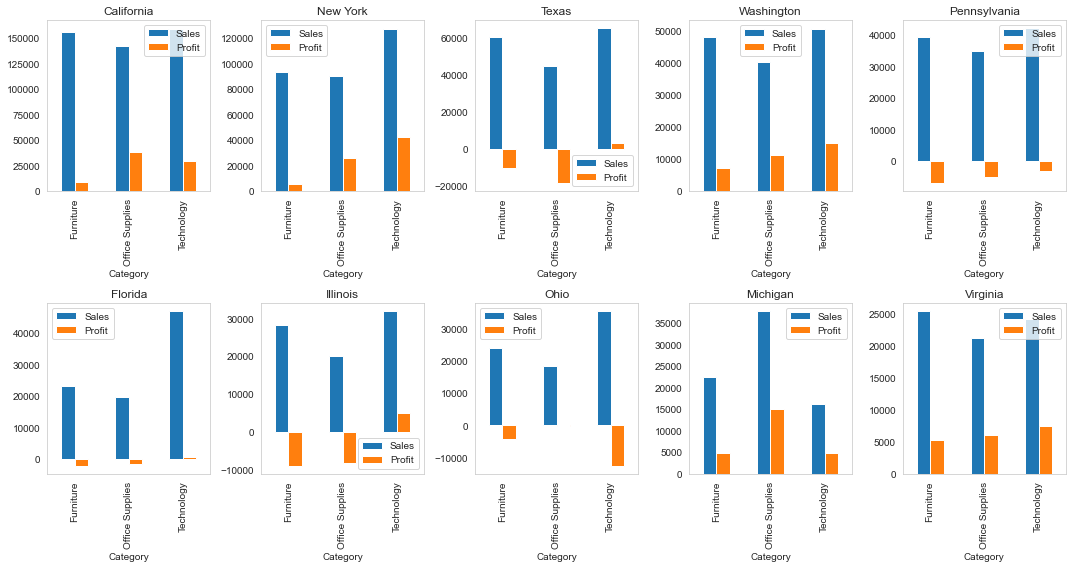

In [22]:
#top 10 sales by state per product category
top_state_sales = df.groupby('State')['Sales'].sum().nlargest(10)
product_perf_state = df[df['State'].isin(top_state_sales.index)].groupby(['State','Category']).agg({'Sales':'sum','Profit':'sum'}).reset_index()

plt.figure(figsize=(15,8))
for state in top_state_sales.index:
    plt.subplot(2,5,top_state_sales.index.get_loc(state)+1)
    product_perf_state[product_perf_state['State']== state].set_index('Category')[['Sales','Profit']].plot(kind='bar',ax=plt.gca())
    plt.title(state)
    plt.tight_layout()
    plt.grid()

plt.show()

When we look at the chart, although the states have the highest sales revenues, the profits are not always the highest either. There are several states where the profits are minus such as Texas, Pennsylvania, Florida, Illinois and Ohio

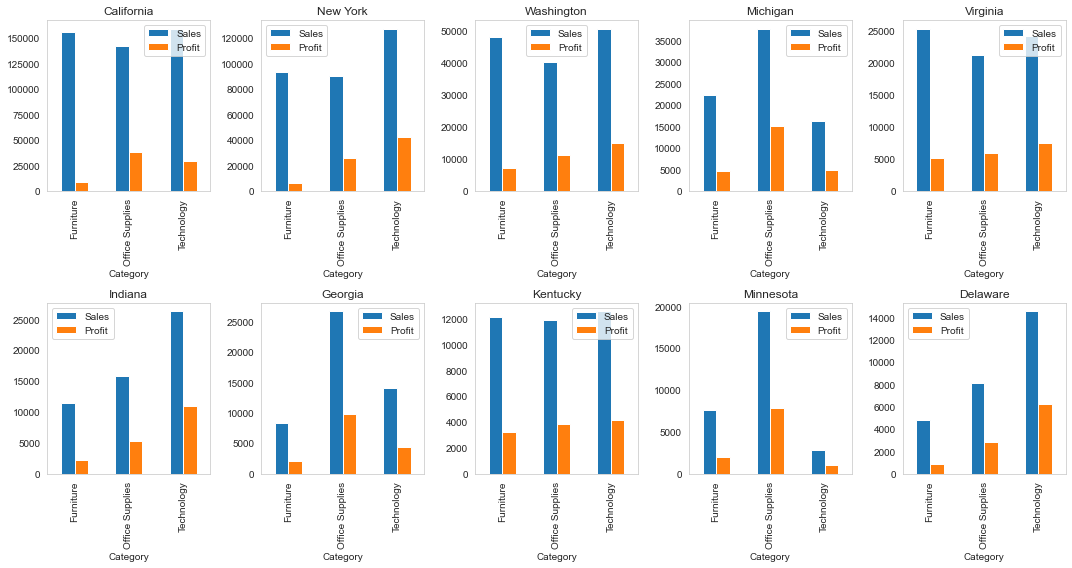

In [23]:
#top 10 profit by state per product category
top_state_profit = df.groupby('State')['Profit'].sum().nlargest(10)
product_cat_state = df[df['State'].isin(top_state_profit.index)].groupby(['State','Category']).agg({'Sales':'sum','Profit':'sum'}).reset_index()

plt.figure(figsize=(15,8))
for state in top_state_profit.index:
    plt.subplot(2,5,top_state_profit.index.get_loc(state)+1)
    product_cat_state[product_cat_state['State']== state].set_index('Category')[['Sales','Profit']].plot(kind='bar',ax=plt.gca())
    plt.title(state)
    plt.tight_layout()
    plt.grid()

plt.show()

The states with the highest sales revenue are shown again on this chart as the states with the highest profits as well. California, New York, Washington, Michigan, and Virginia were in the top 10 sales by state, but they reappeared in the profit top 10 by state.

In [24]:
product_sub = df.groupby(['Category','Sub-Category']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).reset_index()
product_sub

,Category,Sub-Category,Sales,Profit,Quantity
0,Furniture,Bookcases,114879.9963,-3472.5560,868
1,Furniture,Chairs,328449.1030,26590.1663,2356
2,Furniture,Furnishings,91705.1640,13059.1436,3563
3,Furniture,Tables,206965.5320,-17725.4811,1241
4,Office Supplies,Appliances,107532.1610,18138.0054,1729
5,Office Supplies,Art,27118.7920,6527.7870,3000
6,Office Supplies,Binders,203412.7330,30221.7633,5974
7,Office Supplies,Envelopes,16476.4020,6964.1767,906
8,Office Supplies,Fasteners,3024.2800,949.5182,914
9,Office Supplies,Labels,12486.3120,5546.2540,1400


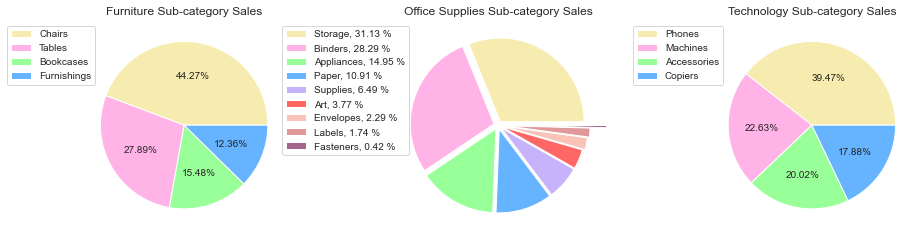

In [25]:
#sub category sales by category
fur = product_sub[product_sub['Category']=='Furniture'].sort_values('Sales',ascending=False)
off = product_sub[product_sub['Category']=='Office Supplies'].sort_values('Sales',ascending=False)
tech = product_sub[product_sub['Category']=='Technology'].sort_values('Sales',ascending=False)

font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7', '#E19898', '#A2678A']

fig, axes = plt.subplots(1, 3, figsize=(15,5))

patches, texts, autotexts = axes[0].pie(fur.Sales, autopct='%1.2f%%', colors=colors)
patche, texts = axes[1].pie(off.Sales, colors=colors, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.08, 0.1, 0.3])
patch, texts, autotexts = axes[2].pie(tech.Sales, autopct='%1.2f%%', colors=colors)

handles, labels = zip(*[(handles,l) for handles, l in zip(patches, fur['Sub-Category'].values)])
hndl, lbl = zip(*[(h,l) for h,l in zip(patch, tech['Sub-Category'].values)])

percents = off['Sales'].to_numpy() * 100 / off['Sales'].to_numpy().sum()

axes[0].set_title('Furniture Sub-category Sales')
axes[1].set_title('Office Supplies Sub-category Sales')
axes[2].set_title('Technology Sub-category Sales')

axes[0].legend(handles, labels,loc="upper right", bbox_to_anchor=(.1,1))
axes[1].legend( bbox_to_anchor=(.1,1), loc='upper right',
            labels=['%s, %1.2f %%' % (l, s) for l, s in zip(off['Sub-Category'].values,percents)])
axes[2].legend(hndl, lbl,loc="upper right", bbox_to_anchor=(.1,1))

fig.subplots_adjust(wspace=.5) # Space between charts

plt.show()

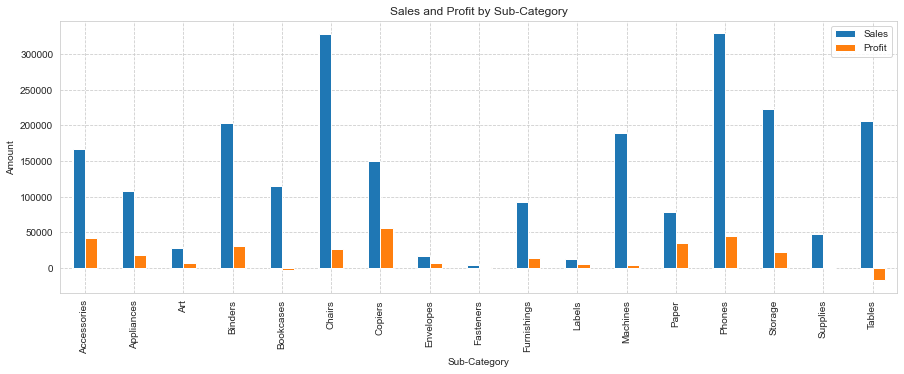

In [26]:
#sales and profit by sub-category
sub_sales = df.groupby('Sub-Category')['Sales','Profit'].sum()

sub_sales.plot(kind='bar', figsize=(15,5))
plt.title('Sales and Profit by Sub-Category')
plt.ylabel('Amount')
plt.show()

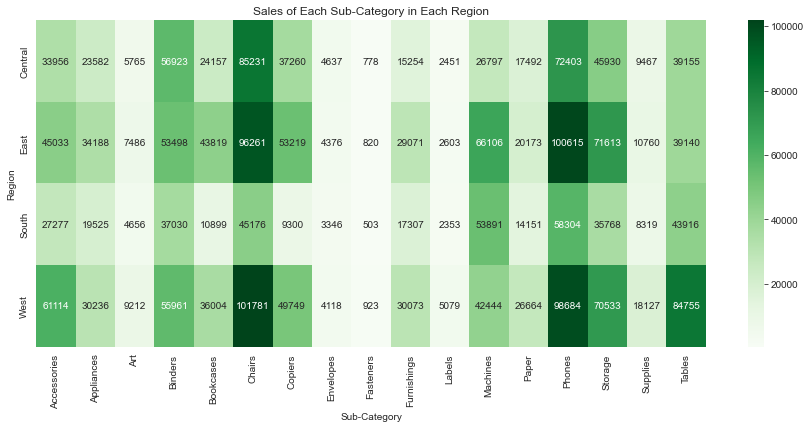

In [27]:
#sales for each sub category by region
reg_sub_sales = df.groupby(['Region','Sub-Category'])['Sales'].sum().unstack()

plt.figure(figsize=(15,6))
sns.heatmap(reg_sub_sales, cmap='Greens', annot=True, fmt=".0f")
plt.title('Sales of Each Sub-Category in Each Region')
plt.xlabel('Sub-Category')
plt.ylabel('Region')
plt.show()

In [28]:
#best sales product each category
best_prod = df.groupby(['Category','Product Name']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).reset_index()

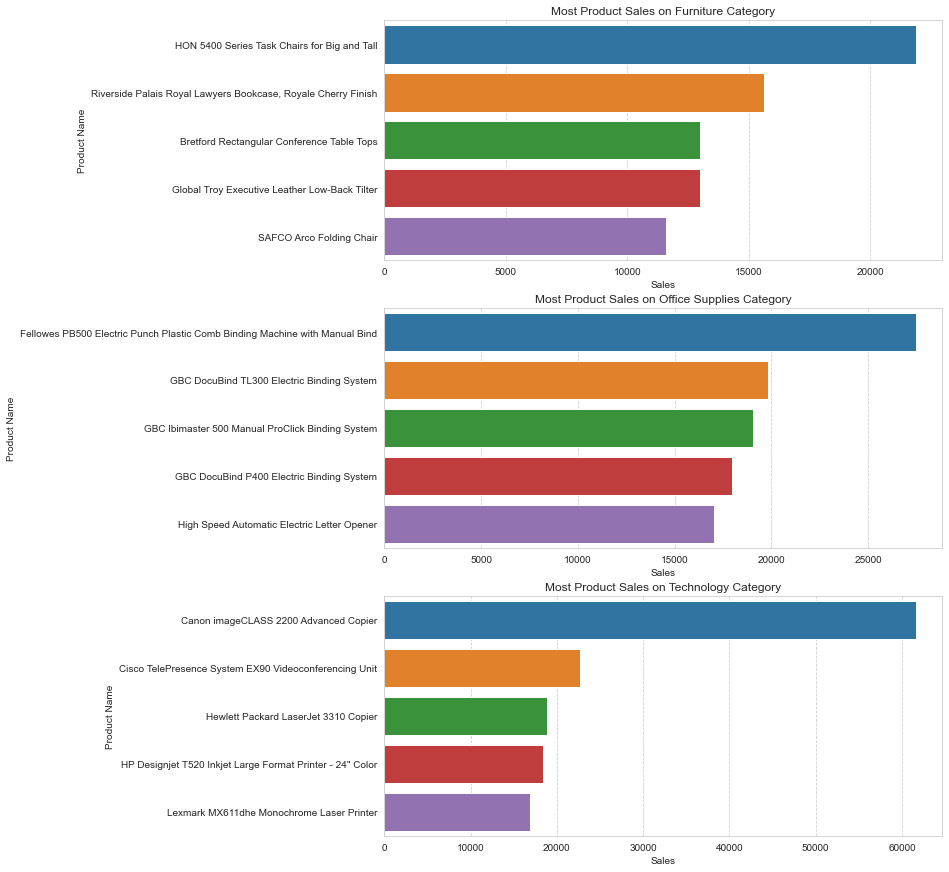

In [29]:
#most product sales by sales
qfur = best_prod[best_prod['Category']=='Furniture'].sort_values('Sales',ascending=False)[:5]
qoff = best_prod[best_prod['Category']=='Office Supplies'].sort_values('Sales',ascending=False)[:5]
qtech = best_prod[best_prod['Category']=='Technology'].sort_values('Sales',ascending=False)[:5]

fig, ax = plt.subplots(3,figsize=(10,15))
sns.barplot(x='Sales', y='Product Name', data=qfur, ax=ax[0])
sns.barplot(x='Sales', y='Product Name', data=qoff, ax=ax[1])
sns.barplot(x='Sales', y='Product Name', data=qtech, ax=ax[2])

ax[0].set_title('Most Product Sales on Furniture Category')
ax[1].set_title('Most Product Sales on Office Supplies Category')
ax[2].set_title('Most Product Sales on Technology Category')

plt.show()

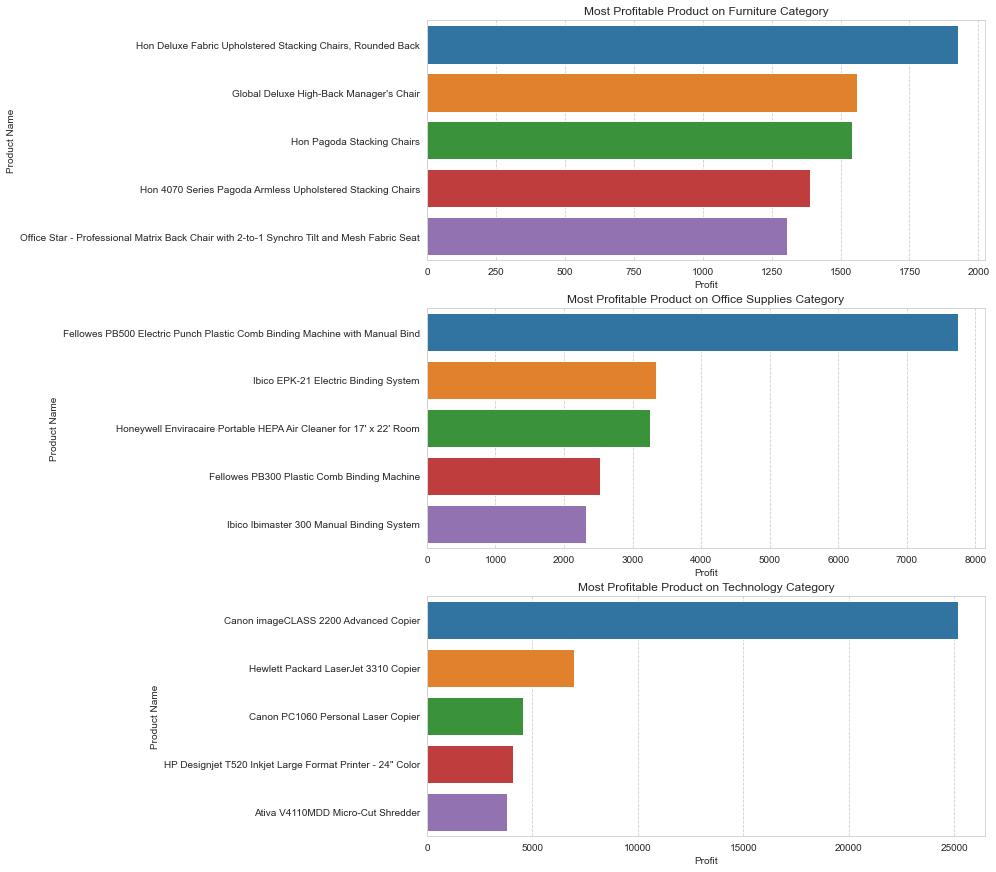

In [30]:
#most profitable product
pfur = best_prod[best_prod['Category']=='Furniture'].sort_values('Profit',ascending=False)[:5]
poff = best_prod[best_prod['Category']=='Office Supplies'].sort_values('Profit',ascending=False)[:5]
ptech = best_prod[best_prod['Category']=='Technology'].sort_values('Profit',ascending=False)[:5]

fig, ax = plt.subplots(3,figsize=(10,15))
sns.barplot(x='Profit', y='Product Name', data=pfur, ax=ax[0])
sns.barplot(x='Profit', y='Product Name', data=poff, ax=ax[1])
sns.barplot(x='Profit', y='Product Name', data=ptech, ax=ax[2])

ax[0].set_title('Most Profitable Product on Furniture Category')
ax[1].set_title('Most Profitable Product on Office Supplies Category')
ax[2].set_title('Most Profitable Product on Technology Category')

plt.show()

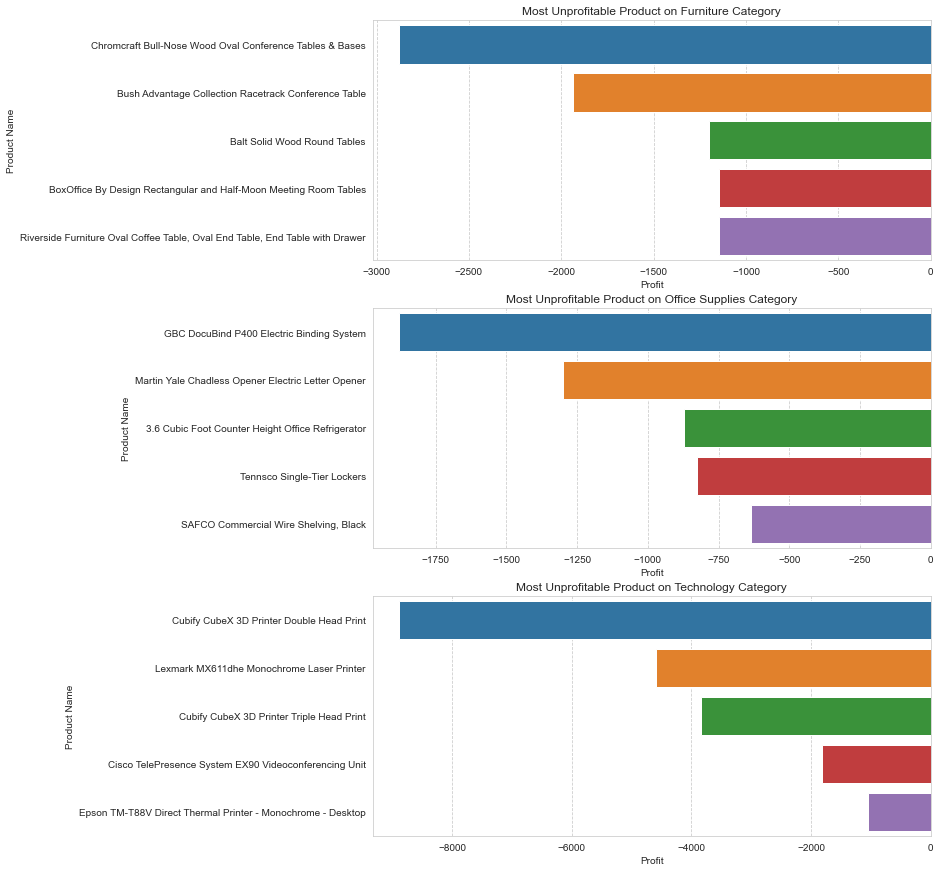

In [31]:
#product with least profit
lfur = best_prod[best_prod['Category']=='Furniture'].sort_values('Profit')[:5]
loff = best_prod[best_prod['Category']=='Office Supplies'].sort_values('Profit')[:5]
ltech = best_prod[best_prod['Category']=='Technology'].sort_values('Profit')[:5]

fig, ax = plt.subplots(3,figsize=(10,15))
sns.barplot(x='Profit', y='Product Name', data=lfur, ax=ax[0])
sns.barplot(x='Profit', y='Product Name', data=loff, ax=ax[1])
sns.barplot(x='Profit', y='Product Name', data=ltech, ax=ax[2])

ax[0].set_title('Most Unprofitable Product on Furniture Category')
ax[1].set_title('Most Unprofitable Product on Office Supplies Category')
ax[2].set_title('Most Unprofitable Product on Technology Category')

plt.show()

##### Sales by Customer Segments
Understanding sales patterns among different customer segments can inform targeted marketing strategies and customer engagement.

In [32]:
#analysis sales by customer segment
cust_sales = df.groupby('Segment').agg({'Sales':'sum','Quantity':'sum','Profit':'sum'}).sort_values('Sales',ascending=False)
cust_sales

,Sales,Quantity,Profit
Segment,,,
Consumer,1.161401e+06,19521,134119.2092
Corporate,7.061464e+05,11608,91979.1340
Home Office,4.296531e+05,6744,60298.6785


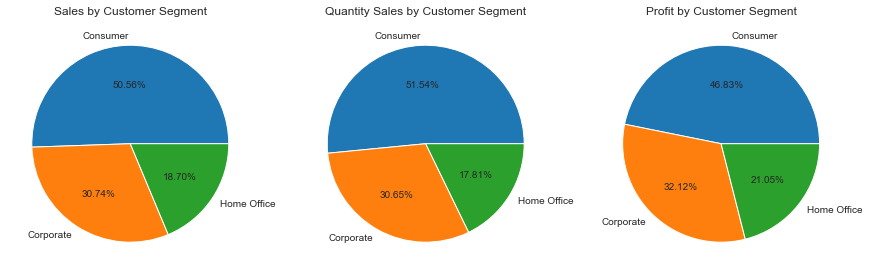

In [33]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].pie(cust_sales.Sales, autopct='%1.2f%%', labels=cust_sales.Sales.index)
ax[1].pie(cust_sales.Quantity, autopct='%1.2f%%', labels=cust_sales.Quantity.index)
ax[2].pie(cust_sales.Profit, autopct='%1.2f%%', labels=cust_sales.Profit.index)

ax[0].set_title('Sales by Customer Segment')
ax[1].set_title('Quantity Sales by Customer Segment')
ax[2].set_title('Profit by Customer Segment')
plt.show()

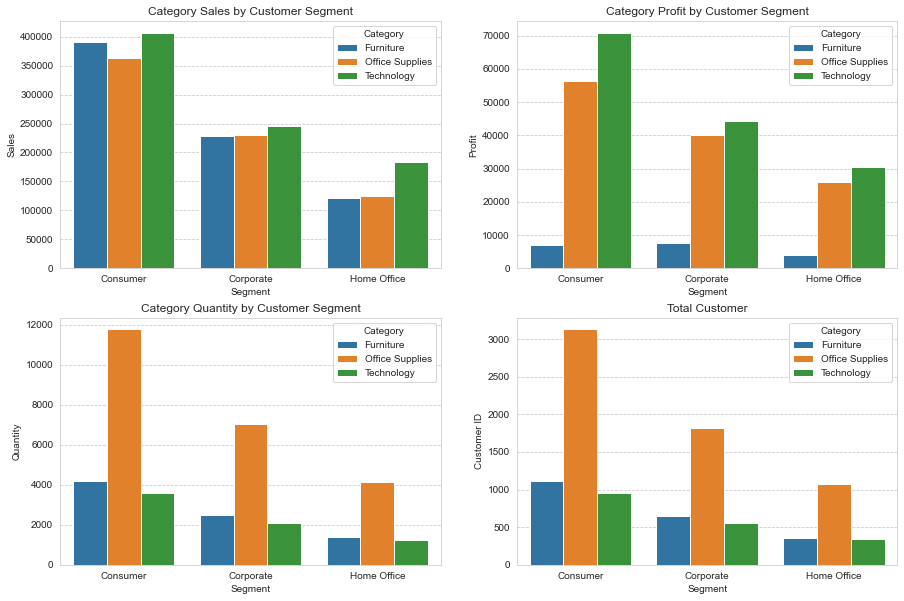

In [34]:
#category product each customer segment
cust_most = df.groupby(['Segment','Category']).agg({'Sales':'sum','Quantity':'sum','Customer ID':'count','Profit':'sum'}).reset_index()

fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.barplot(x='Segment', y='Sales', hue='Category', data=cust_most, ax=ax[0,0]).set(title='Category Sales by Customer Segment')
sns.barplot(x='Segment', y='Profit', hue='Category', data=cust_most, ax=ax[0,1]).set(title='Category Profit by Customer Segment')
sns.barplot(x='Segment', y='Quantity', hue='Category', data=cust_most, ax=ax[1,0]).set(title='Category Quantity by Customer Segment')
sns.barplot(x='Segment', y='Customer ID', hue='Category', data=cust_most, ax=ax[1,1]).set(title='Total Customer')
plt.show()

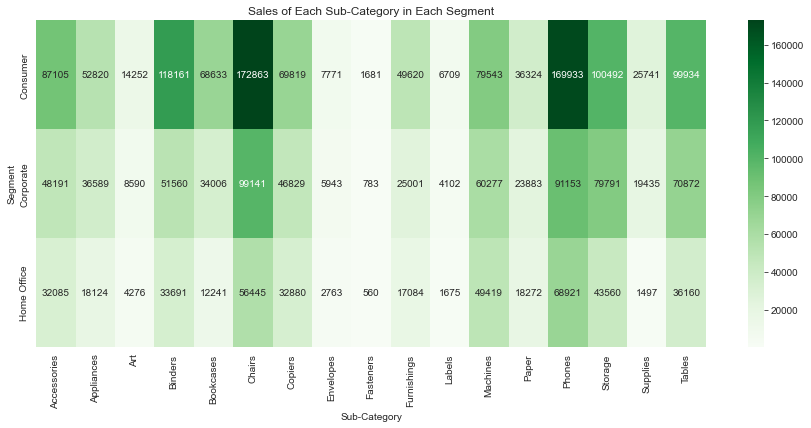

In [35]:
#sales for each sub category by segment
reg_sub_sales = df.groupby(['Segment','Sub-Category'])['Sales'].sum().unstack()

plt.figure(figsize=(15,6))
sns.heatmap(reg_sub_sales, cmap='Greens', annot=True, fmt=".0f")
plt.title('Sales of Each Sub-Category in Each Segment')
plt.xlabel('Sub-Category')
plt.ylabel('Segment')
plt.show()

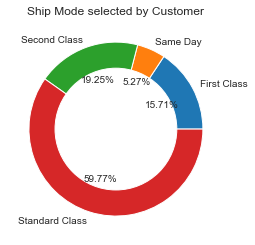

In [36]:
#ship
ship = df.groupby('Ship Mode')['Order ID'].nunique()

plt.pie(ship, labels=ship.index, autopct='%1.2f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Ship Mode selected by Customer')
plt.show()

In [37]:
#ship mode by customer segment
ship_cust = df.groupby(['Segment', 'Ship Mode'])['Order ID'].nunique().reset_index()
ship_cust

,Segment,Ship Mode,Order ID
0,Consumer,First Class,396
1,Consumer,Same Day,157
2,Consumer,Second Class,498
3,Consumer,Standard Class,1535
4,Corporate,First Class,250
5,Corporate,Same Day,58
6,Corporate,Second Class,301
7,Corporate,Standard Class,905
8,Home Office,First Class,141
9,Home Office,Same Day,49


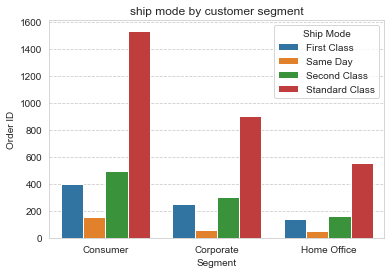

In [38]:
sns.barplot(x='Segment', y='Order ID', hue='Ship Mode', data=ship_cust).set(title='ship mode by customer segment')
plt.show()

##### Sales Trends
Identifying sales trends over time, such as monthly, can help in inventory management and marketing planning.

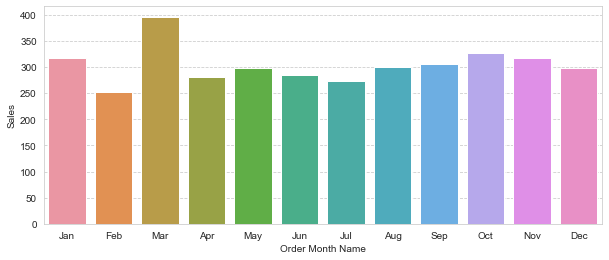

In [39]:
#sales trends
Monthly_Sales = df.groupby(['Order Month Name','Category']).agg({'Sales':'mean', 'Quantity':'mean'}).reset_index()
Monthly_Sales = Monthly_Sales.set_index('Order Month Name')
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales.index = pd.CategoricalIndex(Monthly_Sales.index, categories=months_ordered, ordered=True)
Monthly_Sales = Monthly_Sales.sort_index().reset_index()

fig, axes = plt.subplots(figsize=(10,4))
sns.barplot(x="Order Month Name", y= 'Sales', ci=None,
                data=Monthly_Sales)
sns.set(style='ticks')
#sns.set_style('ticks')
plt.show()

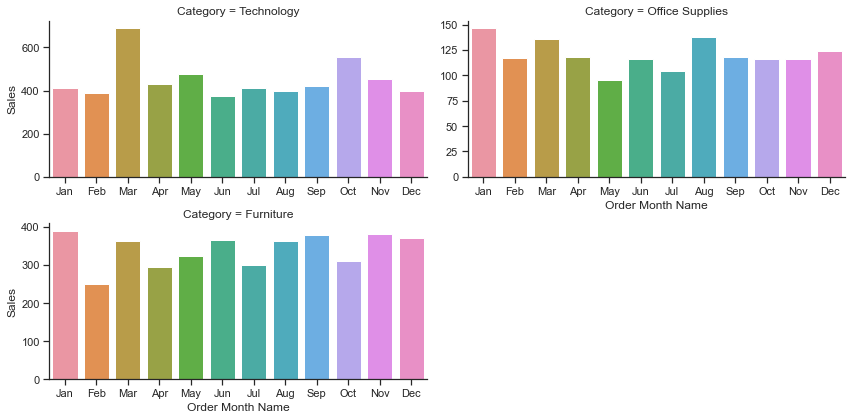

In [40]:
sns.catplot(x='Order Month Name', y= 'Sales', col="Category", col_wrap=2,
                data=Monthly_Sales, sharey=False, sharex=False, height=3, aspect=2,
                kind="bar")

plt.show()

Technology is more likely to make the highest sales revenue in March, office supplies make the highest sales revenue in January same as furniture where the highest sales revenue is in January

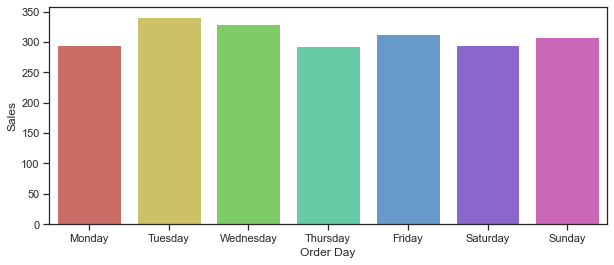

In [41]:
Day_Sales = df.groupby(['Order Day','Category']).agg({'Sales':'mean'}).reset_index()
Day_Sales = Day_Sales.set_index('Order Day')
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Day_Sales.index = pd.CategoricalIndex(Day_Sales.index, categories=day_ordered, ordered=True)
Day_Sales = Day_Sales.sort_index().reset_index()

fig, axes = plt.subplots(figsize=(10,4))
sns.barplot(x="Order Day", y= 'Sales', ci=None,
                data=Day_Sales, palette='hls', ax=axes)

plt.show()

##### Product Performance
Analyzing individual product sales can help identify popular products and slow-moving items

In [42]:
#popular product
popular_product = df.groupby(['Product Name',
                              'Category']).agg({'Customer ID':'count',
                                                'Quantity':'sum'}).rename(columns = {'Customer ID':'Customer counts'}).nlargest(10,'Customer counts')
popular_product

,,Customer counts,Quantity
Product Name,Category,,
Staple envelope,Office Supplies,48,170
Easy-staple paper,Office Supplies,46,150
Staples,Office Supplies,46,215
Avery Non-Stick Binders,Office Supplies,20,71
Staples in misc. colors,Office Supplies,19,86
KI Adjustable-Height Table,Furniture,18,74
Staple remover,Office Supplies,18,61
Storex Dura Pro Binders,Office Supplies,17,71
Staple-based wall hangings,Furniture,16,62


In [43]:
#slow-moving items
slow_product = df.groupby(['Product Name',
                           'Category']).agg({'Customer ID':'count',
                                             'Quantity':'sum'}).rename(columns = {'Customer ID':'Customer counts'}).sort_values('Quantity').head(10)
slow_product

,,Customer counts,Quantity
Product Name,Category,,
Boston 1900 Electric Pencil Sharpener,Office Supplies,1,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",Furniture,1,1
Penpower WorldCard Pro Card Scanner,Technology,1,1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,Furniture,1,1
Xerox 20,Office Supplies,1,1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,Office Supplies,1,2
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,1,2
Xerox 1989,Office Supplies,1,2
NeatDesk Desktop Scanner & Digital Filing System,Technology,1,2


##### Discounts
Analysis the impact of discounts on sales

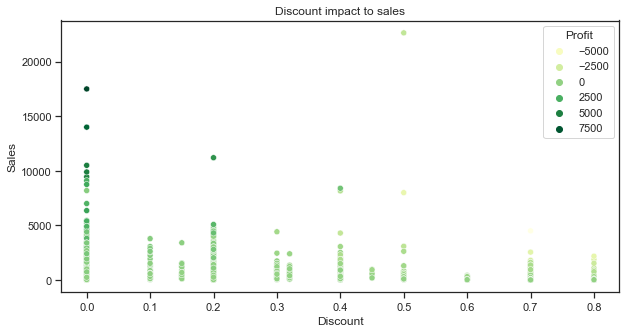

In [44]:
#discount impact to sales
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Sales', hue='Profit', data=df, palette='YlGn')
plt.title('Discount impact to sales')
plt.show()

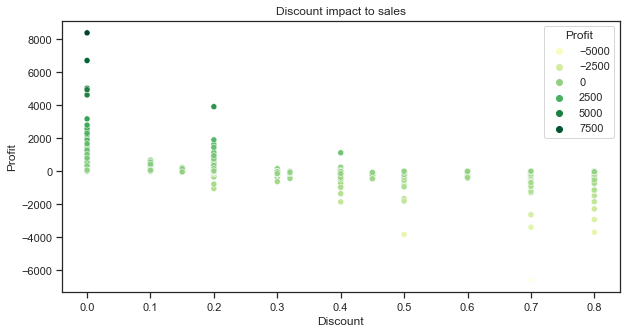

In [45]:
#discount impact to profit
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Profit', hue='Profit', data=df, palette='YlGn')
plt.title('Discount impact to sales')
plt.show()

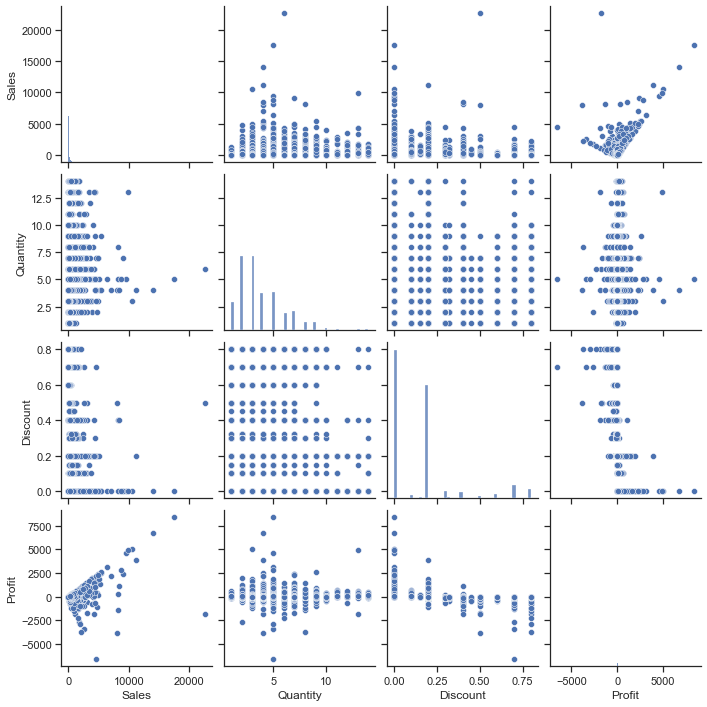

In [46]:
#pairplot to see correlation
df_numeric = df[['Sales','Quantity','Discount','Profit']]

sns.pairplot(df_numeric)
plt.show()

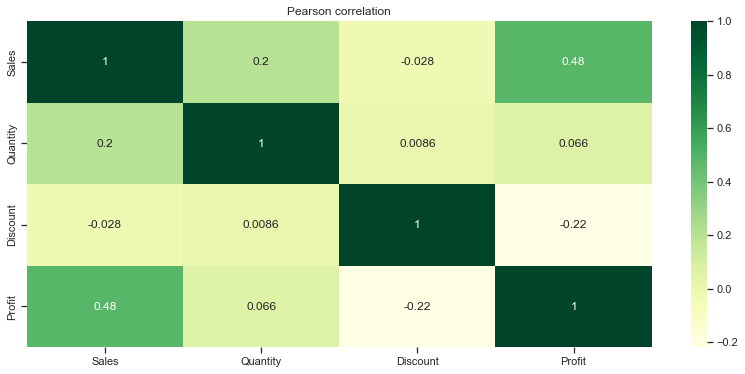

In [47]:
plt.figure(figsize=(14, 6))
datacorr = sns.heatmap(df_numeric.corr(), cmap="YlGn", annot=True)
plt.title('Pearson correlation')
plt.show()

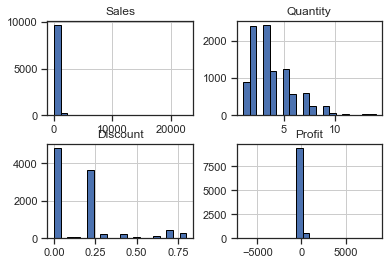

In [48]:
df_numeric.hist(edgecolor='black', bins=20)
plt.show()

The Spearman correlation coefficient is often used when one or both of the variables are not normally distributed. Spearman correlation coefficient can be used to determine whether there is a linear or nonlinear relationship between two variables

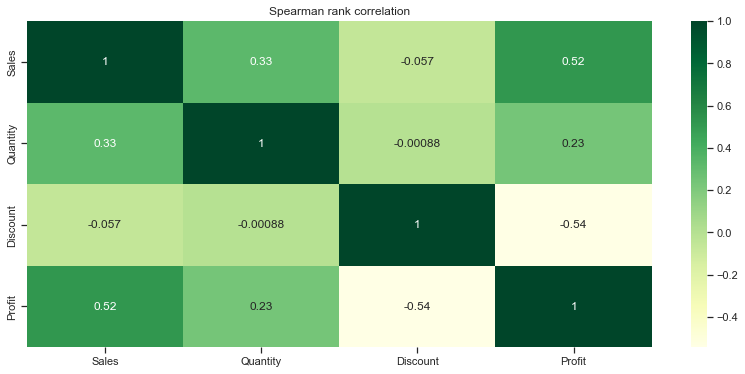

In [49]:
plt.figure(figsize=(14, 6))
datacorr = sns.heatmap(df_numeric.corr(method='spearman'), cmap="YlGn", annot=True)
plt.title('Spearman rank correlation')
plt.show()